<a href="https://colab.research.google.com/github/Mahfujul-01726/Random/blob/main/SynergyX2024_Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data.shape

(621165, 68)

In [42]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Load the dataset
data = pd.read_csv("train.csv")

# Drop non-numeric columns, assuming 'id' is retained separately for later merging
data_numeric = data.select_dtypes(include=[int, float])

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')  # Create an imputer instance
data_imputed = imputer.fit_transform(data_numeric)  # Fit and transform the data

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_imputed)  # Use imputed data for scaling

# Apply PCA to retain 95% variance
pca = PCA(0.95)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
# Ensure that the number of columns in 'principal_components' matches dynamically with the PCA output
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
pca_df = pd.DataFrame(data=principal_components, columns=pca_columns)

# Combine with the original 'id' column
# Make sure 'id' exists in the original data
if 'id' in data.columns:
    final_df = pd.concat([data[['id']].reset_index(drop=True), pca_df], axis=1)
else:
    print("Warning: 'id' column not found in the original data. Proceeding without it.")
    final_df = pca_df

# Output the results
print(final_df)


            id       PC1       PC2       PC3       PC4       PC5       PC6  \
0            1 -1.903889 -0.319795  0.488178  0.841736 -0.177859 -2.018601   
1            2  1.457824  1.424157  0.887539  1.763041 -0.305114 -0.163977   
2            3 -2.769396 -0.188970 -0.286369 -0.175831 -0.314265 -2.494874   
3            4 -1.139023  2.208607 -0.100306 -0.016709  0.162793  1.177261   
4            5 -1.370543  0.385924  1.317084  2.066610 -0.130758  0.260241   
...        ...       ...       ...       ...       ...       ...       ...   
621160  621161 -3.365303  0.049360 -0.580759 -0.985021 -0.026940  0.619196   
621161  621162  1.190969 -0.644508 -0.459271 -0.493544 -0.005019 -0.039632   
621162  621163  1.498572 -2.960456 -0.783660 -0.609964 -0.278076 -1.801225   
621163  621164 -0.377815  2.168986  0.546362  1.194227 -0.267992 -1.368690   
621164  621165  0.098803 -1.770530 -0.816650 -1.414810  0.101977 -1.070417   

             PC7       PC8       PC9  ...      PC33      PC34  

In [43]:
# Save the results to a new CSV file
final_df.to_csv("modified_train.csv", index=False)

In [ ]:
final_df.shape

(621165, 43)

In [ ]:
|import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv("train.csv")

# Drop non-numeric columns
data_numeric = data.select_dtypes(include=[int, float])

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')  # Create an imputer instance
data_imputed = imputer.fit_transform(data_numeric)  # Fit and transform the data

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_imputed)  # Use imputed data for scaling

# Apply PCA with 30 components
pca = PCA(n_components=30)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
pca_df = pd.DataFrame(data=principal_components, columns=pca_columns)

# Combine with the original 'id' column if it exists
if 'id' in data.columns:
    final_df = pd.concat([data[['id']].reset_index(drop=True), pca_df], axis=1)
else:
    print("Warning: 'id' column not found in the original data. Proceeding without it.")
    final_df = pca_df

# Output the results
print(final_df)


            id       PC1       PC2       PC3       PC4       PC5       PC6  \
0            1 -1.903889 -0.319795  0.488178  0.841736 -0.177859 -2.018601   
1            2  1.457824  1.424157  0.887539  1.763041 -0.305114 -0.163977   
2            3 -2.769396 -0.188970 -0.286369 -0.175831 -0.314265 -2.494874   
3            4 -1.139023  2.208607 -0.100306 -0.016709  0.162793  1.177261   
4            5 -1.370543  0.385924  1.317084  2.066610 -0.130758  0.260241   
...        ...       ...       ...       ...       ...       ...       ...   
621160  621161 -3.365303  0.049360 -0.580759 -0.985021 -0.026940  0.619196   
621161  621162  1.190969 -0.644508 -0.459271 -0.493544 -0.005019 -0.039632   
621162  621163  1.498572 -2.960456 -0.783660 -0.609964 -0.278076 -1.801225   
621163  621164 -0.377815  2.168986  0.546362  1.194227 -0.267992 -1.368690   
621164  621165  0.098803 -1.770530 -0.816650 -1.414810  0.101977 -1.070417   

             PC7       PC8       PC9  ...      PC21      PC22  

# Variance Curve for 43 column

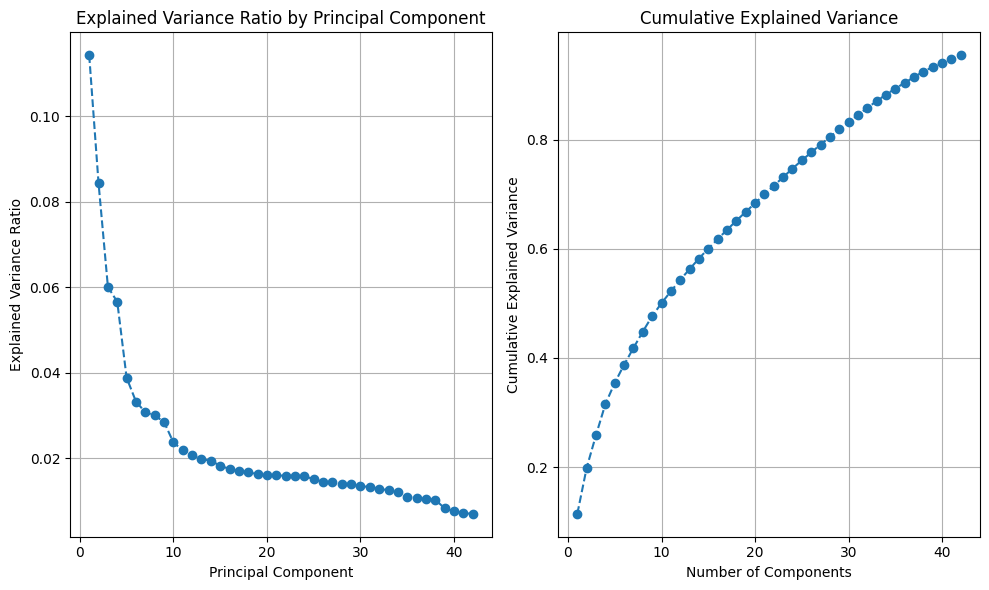

            id       PC1       PC2       PC3       PC4       PC5       PC6  \
0            1 -1.903889 -0.319795  0.488178  0.841736 -0.177859 -2.018601   
1            2  1.457824  1.424157  0.887539  1.763041 -0.305114 -0.163977   
2            3 -2.769396 -0.188970 -0.286369 -0.175831 -0.314265 -2.494874   
3            4 -1.139023  2.208607 -0.100306 -0.016709  0.162793  1.177261   
4            5 -1.370543  0.385924  1.317084  2.066610 -0.130758  0.260241   
...        ...       ...       ...       ...       ...       ...       ...   
621160  621161 -3.365303  0.049360 -0.580759 -0.985021 -0.026940  0.619196   
621161  621162  1.190969 -0.644508 -0.459271 -0.493544 -0.005019 -0.039632   
621162  621163  1.498572 -2.960456 -0.783660 -0.609964 -0.278076 -1.801225   
621163  621164 -0.377815  2.168986  0.546362  1.194227 -0.267992 -1.368690   
621164  621165  0.098803 -1.770530 -0.816650 -1.414810  0.101977 -1.070417   

             PC7       PC8       PC9  ...      PC33      PC34  

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("train.csv")

# Drop non-numeric columns, assuming 'id' is retained separately for later merging
data_numeric = data.select_dtypes(include=[int, float])

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')  # Create an imputer instance
data_imputed = imputer.fit_transform(data_numeric)  # Fit and transform the data

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_imputed)  # Use imputed data for scaling

# Apply PCA to retain 95% variance
pca = PCA(0.95)
pca.fit(scaled_data)

# Plot Explained Variance
plt.figure(figsize=(10, 6))

# Plot explained variance ratio (individual)
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.grid(True)

# Plot cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

# Create a DataFrame with the principal components
# Ensure that the number of columns in 'principal_components' matches dynamically with the PCA output
principal_components = pca.transform(scaled_data)
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
pca_df = pd.DataFrame(data=principal_components, columns=pca_columns)

# Combine with the original 'id' column
if 'id' in data.columns:
    final_df = pd.concat([data[['id']].reset_index(drop=True), pca_df], axis=1)
else:
    print("Warning: 'id' column not found in the original data. Proceeding without it.")
    final_df = pca_df

# Output the results
print(final_df)


# Variance curve for 31 column

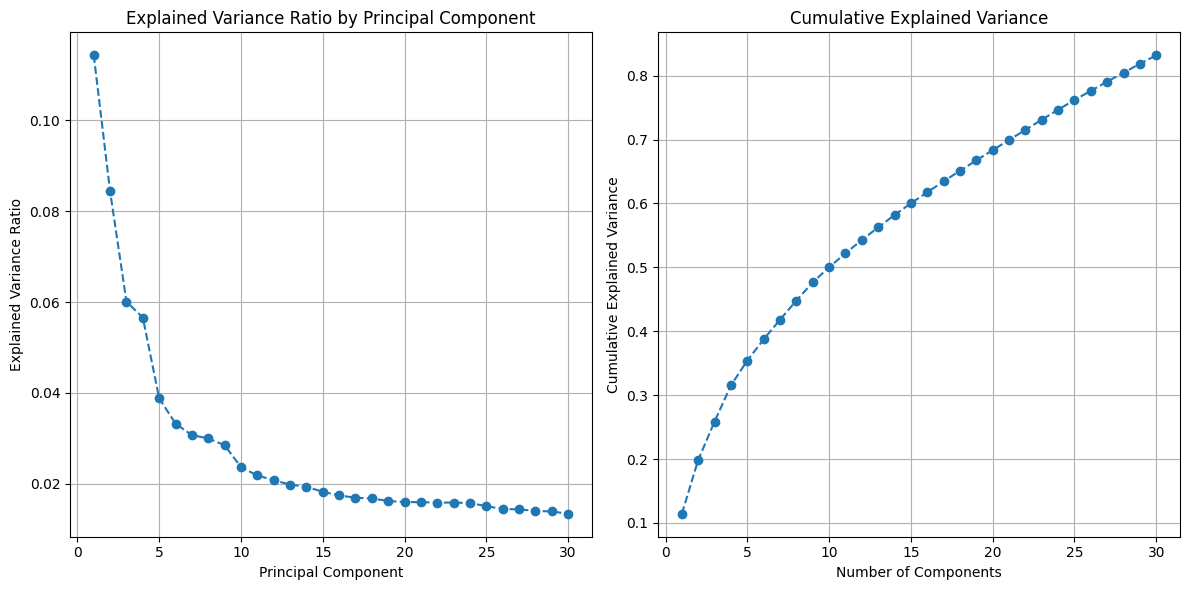

            id       PC1       PC2       PC3       PC4       PC5       PC6  \
0            1 -1.903889 -0.319795  0.488178  0.841736 -0.177859 -2.018601   
1            2  1.457824  1.424157  0.887539  1.763041 -0.305114 -0.163977   
2            3 -2.769396 -0.188970 -0.286369 -0.175831 -0.314265 -2.494874   
3            4 -1.139023  2.208607 -0.100306 -0.016709  0.162793  1.177261   
4            5 -1.370543  0.385924  1.317084  2.066610 -0.130758  0.260241   
...        ...       ...       ...       ...       ...       ...       ...   
621160  621161 -3.365303  0.049360 -0.580759 -0.985021 -0.026940  0.619196   
621161  621162  1.190969 -0.644508 -0.459271 -0.493544 -0.005019 -0.039632   
621162  621163  1.498572 -2.960456 -0.783660 -0.609964 -0.278076 -1.801225   
621163  621164 -0.377815  2.168986  0.546362  1.194227 -0.267992 -1.368690   
621164  621165  0.098803 -1.770530 -0.816650 -1.414810  0.101977 -1.070417   

             PC7       PC8       PC9  ...      PC21      PC22  

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("train.csv")

# Drop non-numeric columns
data_numeric = data.select_dtypes(include=[int, float])

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')  # Create an imputer instance
data_imputed = imputer.fit_transform(data_numeric)  # Fit and transform the data

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_imputed)  # Use imputed data for scaling

# Apply PCA with 30 components
pca = PCA(n_components=30)
pca.fit(scaled_data)

# Plot the explained variance ratio and cumulative explained variance
plt.figure(figsize=(12, 6))

# Plot explained variance ratio (individual)
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.grid(True)

# Plot cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

# Create a DataFrame with the principal components
# FIX: Update pca_columns to match the number of components
principal_components = pca.transform(scaled_data)  # Apply PCA transformation
pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]  # Use pca.n_components_
pca_df = pd.DataFrame(data=principal_components, columns=pca_columns)

# Combine with the original 'id' column if it exists
if 'id' in data.columns:
    final_df = pd.concat([data[['id']].reset_index(drop=True), pca_df], axis=1)
else:
    print("Warning: 'id' column not found in the original data. Proceeding without it.")
    final_df = pca_df

# Output the final DataFrame
print(final_df)


# Test Data set

In [33]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Load the dataset
data = pd.read_csv("test.csv")

# Drop non-numeric columns, assuming 'id' is retained separately for later merging
data_numeric = data.select_dtypes(include=[int, float])

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')  # Create an imputer instance
data_imputed = imputer.fit_transform(data_numeric)  # Fit and transform the data

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_imputed)  # Use imputed data for scaling

# Apply PCA to retain 95% variance
pca = PCA(0.95)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
# Ensure that the number of columns in 'principal_components' matches dynamically with the PCA output
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
pca_df = pd.DataFrame(data=principal_components, columns=pca_columns)

# Combine with the original 'id' column
# Make sure 'id' exists in the original data
if 'id' in data.columns:
    final_df = pd.concat([data[['id']].reset_index(drop=True), pca_df], axis=1)
else:
    print("Warning: 'id' column not found in the original data. Proceeding without it.")
    final_df = pca_df

# Output the results
print(final_df)


            id       PC1       PC2       PC3       PC4       PC5       PC6  \
0            1  1.447940 -1.031742 -1.086963 -0.830999 -0.292706 -1.942642   
1            2 -2.021247 -1.870304  0.845322  0.860733 -0.003240 -0.048324   
2            3  5.336411  2.519909  0.668718  1.170826 -0.087026 -2.407870   
3            4  1.829537  3.228858  0.027728  0.304632 -0.150098 -1.015597   
4            5  3.922917  0.785828  0.064960  0.270616  0.057746 -0.344591   
...        ...       ...       ...       ...       ...       ...       ...   
186729  186730 -0.723745 -1.337983  1.517132  1.474750  0.160323  0.546402   
186730  186731 -0.371750 -2.285737  0.505051  0.518021  0.097893  0.043259   
186731  186732  0.190465  0.036798 -1.509402 -1.835396  0.157658 -0.093349   
186732  186733  0.000846  2.458180  0.904829  0.956019  0.047638 -0.298822   
186733  186734  2.839280  1.748881  3.455433  3.654427  0.275282  1.096375   

             PC7       PC8       PC9  ...      PC31      PC32  

In [45]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("train.csv")

# Drop non-numeric columns except for the target if it's not numeric
data_numeric = data.select_dtypes(include=[int, float])

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_numeric)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_imputed)

# Apply PCA to retain 95% variance
pca = PCA(0.95)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
pca_df = pd.DataFrame(data=principal_components, columns=pca_columns)

# Check and combine with 'id' column if it exists
if 'id' in data.columns:
    final_df = pd.concat([data[['id']].reset_index(drop=True), pca_df], axis=1)
else:
    print("Warning: 'id' column not found in the original data. Proceeding without it.")
    final_df = pca_df

# Use 'v17' as the target column
target_column_name = 'PC16'
if target_column_name in data.columns:
    X = pca_df  # Use the PCA-transformed data as features
    y = data[target_column_name]  # Extract the target column from the original data
else:
    raise ValueError(f"The dataset doesn't contain a '{target_column_name}' column.")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Classifier Accuracy: {accuracy:.4f}')


ValueError: The dataset doesn't contain a 'PC16' column.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("modified_train.csv")

# Ensure all necessary columns are present
if 'PC16' not in data.columns:
    raise ValueError("The dataset doesn't contain a 'PC16' column.")

# Prepare the features and target
X = data.drop(columns=['id', 'PC16'])
y = data['PC16']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
